In [14]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape
import matplotlib.pyplot as plt
import numpy as np


In [15]:
#MNIST 데이터셋
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255


In [16]:
#생성자 모델
autoencoder = Sequential()

In [17]:
#인코딩 부분
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),
                       activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',
                       activation='relu'))


In [18]:
#디코딩 부분
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',
                       activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',
                       activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',
                       activation='sigmoid'))


In [19]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 8)          

In [20]:
#컴파일 및 학습
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=50,batch_size=128,
                validation_data=(X_test,X_test))


Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.2099 - val_loss: 0.1338
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1244 - val_loss: 0.1159
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1134 - val_loss: 0.1092
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1084 - val_loss: 0.1052
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1051 - val_loss: 0.1023
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1027 - val_loss: 0.1002
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1008 - val_loss: 0.0986
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0992 - val_loss: 0.0974
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0979 - val_loss: 0.0959
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0967 - val_loss: 0.0948

313/313 [==============================] - 1s 2ms/step


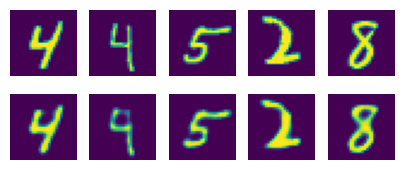

In [22]:
#학습된 결과를 출력
random_test = np.random.randint(X_test.shape[0],size=5)
ae_imgs = autoencoder.predict(X_test)
plt.figure(figsize=(7,2))#출력 이미지의 크기를 정합니다.
for i, image_idx in enumerate(random_test):
    #랜덤으로 뽑은 이미지를 차례로 나열합니다.
    ax =plt.subplot(2,7,i+1)
    #테스트할 이미지를 먼저 그대로 보여줍니다.
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    #오토인코딩 결과를 다음 열에 입력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()